In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("preprocessed_lahore_house_prices.csv")

In [10]:
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

location_freq = df["Location"].value_counts().to_dict()
df["Location_encoded"] = df["Location"].map(location_freq)
df.drop("Location", axis=1, inplace=True)

le = LabelEncoder()
df["Location_encoded"] = le.fit_transform(df["Location"])
df.drop("Location", axis=1, inplace=True)

KeyError: "None of [Index(['Type'], dtype='object')] are in the [columns]"

In [14]:
X = df.drop(["Price", "Area"], axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = Sequential([
    Dense(128, activation='relu'), # ReLu = Rectified Linear Unit
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop], verbose=1)


Epoch 1/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5132859044003840.0000 - val_loss: 4591940125327360.0000
Epoch 2/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2899451085586432.0000 - val_loss: 1261977221464064.0000
Epoch 3/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1127613733011456.0000 - val_loss: 1108957603037184.0000
Epoch 4/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1136384593100800.0000 - val_loss: 999212732907520.0000
Epoch 5/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 939582547820544.0000 - val_loss: 917701904039936.0000
Epoch 6/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 918251458527232.0000 - val_loss: 836602855161856.0000
Epoch 7/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 899518488903680.0000 - val_loss: 792478441537536.0000
Epoch 8/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 830922022715392.0000 - val_loss: 762253280280576.0000
Epoch 9/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 723722658906

In [20]:
y_pred = model.predict(X_test_scaled).flatten()

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
R² Score: 0.7268
RMSE: 30689539.06


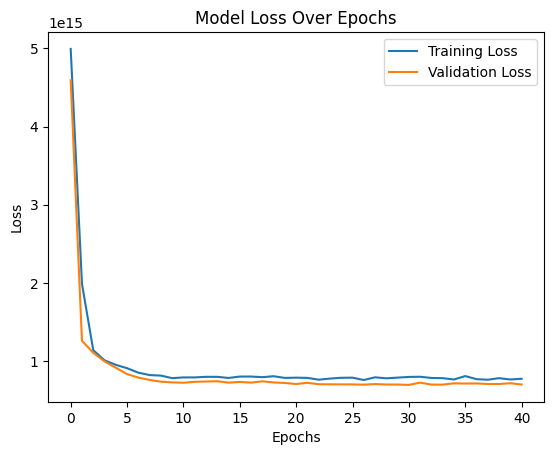

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Summary
The deep learning model showed a test R² score of **0.7268**, which is comparable to Gradient Boosting. While it took longer to train, it was able to capture complex patterns in the data. This shows potential for deep learning in housing price prediction tasks.
